In [4]:
import Ipynb_importer
from Root_MUSIC import Root_MUSIC
from ESPRIT import ESPRIT
import matplotlib.pyplot as plt
import numpy as np

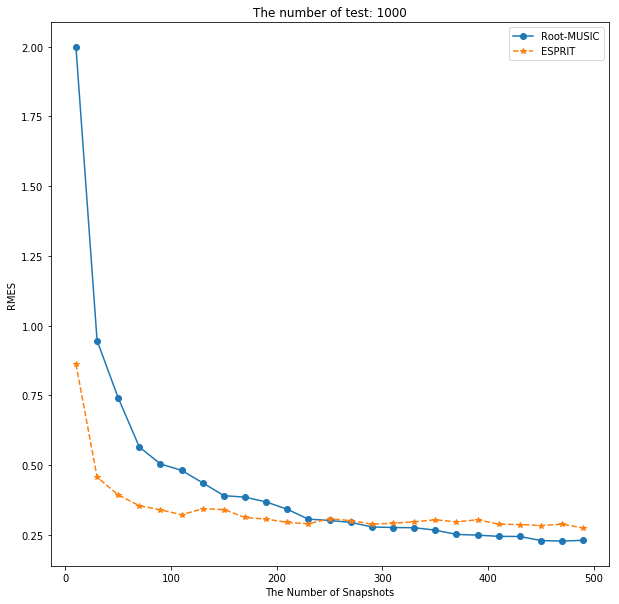

In [10]:
theta_S = np.array([-25, 0, 25])
sensorsNum = 8
SNR = 20

N = 1000

Root_List = []
ESP_List = []
for snapshots in range(10, 500, 20):
    RMES = 0
    
    for itr in range(N):
        theta_hat = Root_MUSIC(SNR, snapshots, sensorsNum)
        
        res = theta_S - theta_hat
        RMES = RMES + np.sqrt(np.dot(res.T, res)/len(theta_S))
        
    RMES = RMES/N
    Root_List.append(RMES)
    
    RMES = 0
    
    for itr in range(N):
        theta_hat = ESPRIT(SNR, snapshots, sensorsNum)
        
        res = theta_S - theta_hat
        RMES = RMES + np.sqrt(np.dot(res.T, res)/len(theta_S))
        
    RMES = RMES/N
    ESP_List.append(RMES)

Root_List = np.array(Root_List)
ESP_List = np.array(ESP_List)

fig = plt.figure(0)
plt.plot(range(10, 500, 20), Root_List, label='Root-MUSIC', marker='o', linestyle='-')
plt.hold
plt.plot(range(10, 500, 20), ESP_List, label='ESPRIT', marker='*', linestyle='--')
plt.legend()
plt.xlabel('The Number of Snapshots')
plt.ylabel('RMES')
plt.title('The number of test: ' + str(N))
fig.set_size_inches(10, 10)
plt.show()
fig.savefig('Root-MUSIC and ESPRIT in different snapshots')